# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

Tecnológico de Monterrey

Prof Luis Eduardo Falcón Morales

### **Actividad de la semana: Modelos basados en Árboles**


**Nombre y matrícula:** 

Carlos Humberto Galvan Perales - A01797969


# **PARTE - A - Métricas de Clasificación**

In [1]:
# Importamos lo necesario para la actividad

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score, f1_score
from sklearn.dummy import DummyClassifier

np.random.seed(17)

In [2]:
# Para esta actividad vamos a generar datos sintéticos para un problema de
# clasificación binario utilizando "make_classification" de scikitlearn.


# Recuerda consultar la documentación para mayor información:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html


# Utilizaremos los siguientes valores de los hiperparámetros de make_classification:
# - n_samples: número de muestras o registros a generar.
# - n_features: número total de características o variables de entrada X. Incluye informativas, redundantes, duplicadas.
# - n_informative: número de características informativas o independientes.
# - n_redundant: número de características redundantes.
# - weights: pesos para las clases [0,1]-->[Clase_Mayoritaria_Negativa(0), clase_minoritaria_positiva(1)].
# - class_sep: separación entre clases (menor a 1 más entrelazados. Mayor a 1, más separados).
# - n_classes: número de clases.
# - n_clusters_per_class: número de cúmulos por clase. Mayor a 1, más complejo.
# - flip_y: fracción de ejemplos cuya clase se cambia aleatoriamente (ruido) para hacerlo más complejo.
# - random_state: semilla para reproducibilidad.

X, y = make_classification(
    n_samples=10_000,          # 10,000 registros
    n_features=20,             # factores en total
    n_informative=15,          # factores informativos o variables de entrada independientes
    n_redundant=5,             # factores redundantes (dependientes). Para añadir complejidad usamos valor > 0
    weights=[0.88, 0.12],      # Desbalance de clases: Mayoritaria clase 0; minoritaria clase 1
    class_sep=1.0,             # Separación entre clases
    n_classes=2,               # Dos clases
    n_clusters_per_class=1,    # Para agregar complejidad adicional considera valores > 1
    flip_y=0.01,               # Añadir algo de ruido. default 0.01
    random_state=17,           # semilla para la repetibilidad
)

In [3]:
# Lo definimos como un DataFrame de Pandas para su mejor manejo:
feature_names = [f'feature_{i+1}' for i in range(20)]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"Total de registros generados: {len(df)}")
print(f"Distribución de clases: {df['target'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'}")
print(f"Cantidad de factores: {len(feature_names)}")

Total de registros generados: 10000
Distribución de clases: target
0    87.7%
1    12.3%
Name: proportion, dtype: object
Cantidad de factores: 20


In [4]:
pd.DataFrame(df).describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,10000.0,1.016138,2.243319,-6.429702,-0.520059,1.025274,2.535350,9.286981
feature_2,10000.0,0.785670,1.994150,-8.578184,-0.462409,0.851269,2.137617,7.937184
feature_3,10000.0,-0.757783,2.127136,-9.574402,-2.200615,-0.782594,0.630210,9.676054
feature_4,10000.0,1.733561,4.820216,-19.158886,-1.578108,1.751568,5.036626,19.051885
feature_5,10000.0,1.004263,2.309019,-6.665816,-0.540579,0.990261,2.538778,9.991830
feature_6,10000.0,-0.758315,2.682632,-11.246005,-2.561001,-0.780123,1.025289,10.297298
feature_7,10000.0,-0.448463,5.527866,-24.457356,-4.152116,-0.447135,3.285445,21.695749
feature_8,10000.0,0.974038,2.446141,-7.820102,-0.651334,0.977687,2.634129,11.292973
feature_9,10000.0,-0.769954,2.546797,-11.410437,-2.475215,-0.740625,0.947244,7.435675
feature_10,10000.0,0.739749,2.267579,-7.860020,-0.747975,0.768796,2.290440,9.363365


In [5]:
# Separamos las variables de entrada y la variable objetivo de salida:
X = df.drop('target', axis=1).values
y = df['target'].values

# Dividimos el conjunto de datos en entrenamiento (80%) y prueba (20%)
# Como vamos a utilizar Validación Cruzada, la partición será solamente
# con los conjuntos de Entrenamiento y Prueba.
# Además usamos "stratify" para mantener la proporción de clases en la partición.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 8000 muestras
Tamaño del conjunto de prueba: 2000 muestras


In [6]:
# Configurar ruta de Graphviz para Windows
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

In [7]:
# Obtengamos los siguientes resultados con la función Dummy,
# con una partición provisional para el Dummy:

Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.2, random_state=17, stratify=y_train)

estrategias = ['most_frequent','prior','stratified','uniform']

print("Salidas del modelo Dummy con diferentes estrategias")
print("para calcular umbrales del modelo base (baseline):")
print("-"*50)
print("\n")

for estrategia in estrategias:
  dummy_clf = DummyClassifier(strategy=estrategia, random_state=17)
  dummy_clf.fit(Xt, yt)
  y_pred = dummy_clf.predict(Xv)

  # Tabla para almacenar resultados
  results = []

  # "pos_label" indica la clase con respecto a la cual evaluar cada métrica.
  acc = accuracy_score(yv, y_pred)
  rec = recall_score(yv, y_pred, pos_label=1)
  prec = precision_score(yv, y_pred, pos_label=1)
  f1_sc = f1_score(yv, y_pred, pos_label=1)

  results.append({'Accuracy': acc,
                'Recall': rec,
                'Precision': prec,
                'F1 Score': f1_sc
                })

  print(f"Estrategia: {estrategia}")
  print(f"Accuracy: {acc:.4f}")
  print(f"Recall: {rec:.4f}")
  print(f"Precision: {prec:.4f}")
  print(f"F1 Score: {f1_sc:.4f}")

  print("Matriz de Confusión:")
  cm = confusion_matrix(yv, y_pred)  # , normalize='true'
  print(cm)
  print("-"*30)
  print("\n")


Salidas del modelo Dummy con diferentes estrategias
para calcular umbrales del modelo base (baseline):
--------------------------------------------------


Estrategia: most_frequent
Accuracy: 0.8769
Recall: 0.0000
Precision: 0.0000
F1 Score: 0.0000
Matriz de Confusión:
[[1403    0]
 [ 197    0]]
------------------------------


Estrategia: prior
Accuracy: 0.8769
Recall: 0.0000
Precision: 0.0000
F1 Score: 0.0000
Matriz de Confusión:
[[1403    0]
 [ 197    0]]
------------------------------


Estrategia: stratified
Accuracy: 0.8006
Recall: 0.1015
Precision: 0.1235
F1 Score: 0.1114
Matriz de Confusión:
[[1261  142]
 [ 177   20]]
------------------------------


Estrategia: uniform
Accuracy: 0.4856
Recall: 0.4670
Precision: 0.1136
F1 Score: 0.1827
Matriz de Confusión:
[[685 718]
 [105  92]]
------------------------------




c:\Users\Carlos Galvan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Carlos Galvan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## **Ejercicio - 1**


**En la salida anterior se obtuvieron dos advertencias (warnings).**

* **1a) ¿A cuáles casos de las estrategias Dummy están asociadas esas advertencias?**

* **1b) Explica qué significan esas advertencias y relaciona la explicación con los valores de las matrices de confusión correspondientes.**

* **1c) ¿Por qué en este caso no escalamos los datos de entrada?**

++++++++++++++ Inicia sección de tus comentarios ++++++++++++++++++

* 1a) Las advertencias están asociadas a las estrategias **most_frequent** y **prior**. Ambas predicen únicamente la clase mayoritaria (clase 0), por lo que no existe ninguna predicción para la clase 1.

* 1b) La advertencia es `UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples`. Esto ocurre porque las estrategias most_frequent y prior predicen todas las muestras como clase 0, sin generar ninguna predicción de clase 1. En las matrices de confusión correspondientes, la segunda columna (predicciones positivas) es completamente cero: TP = 0 y FP = 0. Como Precision = TP / (TP + FP), se obtiene una división 0/0 indefinida, y scikit-learn la establece en 0.0 generando la advertencia.

* 1c) No se escalan los datos porque el clasificador Dummy no utiliza los valores de las características para hacer sus predicciones; se basa únicamente en la distribución de las clases. Escalar los datos no tendría ningún efecto en los resultados. Además, los datos sintéticos generados por `make_classification` ya tienen una escala similar por defecto.

+++++++++++++ Termina sección de tus comentarios +++++++++++++++++++

## **Ejercicio - 2**

**Sabemos que tenemos un problema de clases desbalanceadas y debiéramos utilizar otra métrica que nos ayude a medir mejor el desempeño del modelo. Indica en cada uno de los siguientes incisos cuál sería el valor del modelo base (baseline) que debiéramos utilizar, de acuerdo a la métrica que se indica:**


++++++++++++++ Inicia sección de tus comentarios ++++++++++++++++++


* 2a) Accuracy: **~0.88** (obtenido de las estrategias most_frequent y prior). Corresponde a simplemente predecir la clase mayoritaria para todas las muestras, lo que demuestra que accuracy es engañoso en problemas desbalanceados.

* 2b) Precision: **~0.12** (obtenido de las estrategias stratified y uniform). Este valor es aproximadamente igual a la proporción de la clase minoritaria en los datos.

* 2c) Recall: **~0.50** (obtenido de la estrategia uniform). Al predecir aleatoriamente con probabilidad 50/50, se detecta aproximadamente la mitad de los positivos reales.

* 2d) F1-Score: **~0.19** (obtenido de la estrategia uniform). Es la media armónica de precision (~0.12) y recall (~0.50), y representa el mejor equilibrio que un modelo base ingenuo puede lograr.

+++++++++++++ Termina sección de tus comentarios +++++++++++++++++++

# **PARTE - B - XGBoost**

### **En el siguiente ejercicio explorarás el efecto de algunos de los argumentos del modelo XGBoost.**

### Puedes consultar la documentación:

https://xgboost.readthedocs.io/en/latest/python/python_api.html

Usaremos la base de datos llamada breast-cancer:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html


https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

## **Ejercicio - 3**

### **Describe en qué consiste la base de datos breast_cancer.**

++++++++++++++ Inicia sección de tus comentarios ++++++++++++++++++

La base de datos **breast_cancer** de scikit-learn contiene 569 muestras de mediciones de núcleos celulares de masas mamarias, obtenidas a partir de imágenes digitalizadas de aspiraciones con aguja fina (FNA). Tiene **30 características numéricas** que representan la media, el error estándar y el "peor" valor de 10 propiedades morfológicas: radio, textura, perímetro, área, suavidad, compacidad, concavidad, puntos cóncavos, simetría y dimensión fractal. La variable objetivo es binaria: **maligno (0)** con 212 muestras y **benigno (1)** con 357 muestras. El objetivo es clasificar los tumores como malignos o benignos a partir de estas características.

+++++++++++++ Termina sección de tus comentarios +++++++++++++++++++

In [8]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [9]:
# Cargamos un dataset de ejemplo:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Dividimos en conjuntos de entrenamiento y prueba para los
# própósitos de nuestro ejercicio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

print("Información del conjunto de entrenamiento:")
print("*"*50)
print(f"Número de características: {X_train.shape[1]}")
print(f"Número de muestras: {X_train.shape[0]}")
print(f"Distribución de clases [Maligno, Benigno]: {np.bincount(y_train)}")
print("\nPrimeras 3 filas del conjunto de entrenamiento:")
print(X_train.head(3).T)

Información del conjunto de entrenamiento:
**************************************************
Número de características: 30
Número de muestras: 455
Distribución de clases [Maligno, Benigno]: [170 285]

Primeras 3 filas del conjunto de entrenamiento:
                                285          535          521
mean radius               12.580000    20.550000    24.630000
mean texture              18.400000    20.860000    21.600000
mean perimeter            79.830000   137.800000   165.500000
mean area                489.000000  1308.000000  1841.000000
mean smoothness            0.083930     0.104600     0.103000
mean compactness           0.042160     0.173900     0.210600
mean concavity             0.001860     0.208500     0.231000
mean concave points        0.002924     0.132200     0.147100
mean symmetry              0.169700     0.212700     0.199100
mean fractal dimension     0.058550     0.062510     0.067390
radius error               0.271900     0.698600     0.991500
textur

In [10]:
# Definimos nuestra función que usaremos para el ejercicio:

def mi_exploracion_xgboost(xtr=X_train, ytr=y_train, xte=X_test, yte=y_test,
               mis_estimadores=100,
               mi_learning_rate=1.,
               mi_tree_idx=3
               ):

  # Definimos nuestro modelo XGBoost básico:
  xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Para clasificación binaria.
    nthread=-1,    # Para usar todos los recursos que se tengan.
    n_estimators= mis_estimadores,
    learning_rate= mi_learning_rate,
    random_state=17
    )

  # Aquí ajustamos/entrenamos el modelo
  xgb_model.fit(xtr, ytr)

  # Evaluamos el rendimiento:
  y_pred = xgb_model.predict(xte)

  print("\nReporte de clasificación:")
  print(classification_report(yte, y_pred, target_names=data.target_names))

  # Visualización de los árboles:
  plt.figure(figsize=(18, 24))
  plot_tree(xgb_model,
            tree_idx= mi_tree_idx
            )

  plt.title('tree_idx={}\nestimators={}\nlearning_rate={}'.format(mi_tree_idx,mis_estimadores,mi_learning_rate))
  plt.tight_layout()
  plt.show()


## **Ejercicio - 4**

**Utiliza la función mi_exploracion_xgboost() definida peviamente para responder a los siguientes incisos:**

* **4a) ¿Cuál es, en general, el efecto del argumento "mi_tree_idx" y cuál es el rango de valores que puede tomar?**

* **4b) Modificando solamente el argumento "mi_tree_idx", muestra y explica cada una de las salidas de la función que definimos con los valores mínimo, máximo y otros dos intermedios del argumento "mi_tree_idx".**

* **4c) Incluye tus conclusiones y en particular explica qué información nos dan estos resultados sobre la manera en que se entrena el modelo XGBoost.**




Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        42
      benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1800x2400 with 0 Axes>

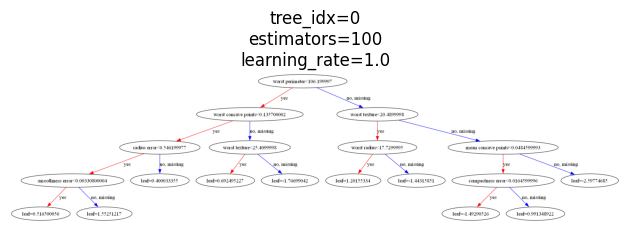

In [11]:
# 4b) Visualización con mi_tree_idx: mínimo (0), intermedios (33, 66) y máximo (99)
mi_exploracion_xgboost(mi_tree_idx=0)



Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        42
      benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1800x2400 with 0 Axes>

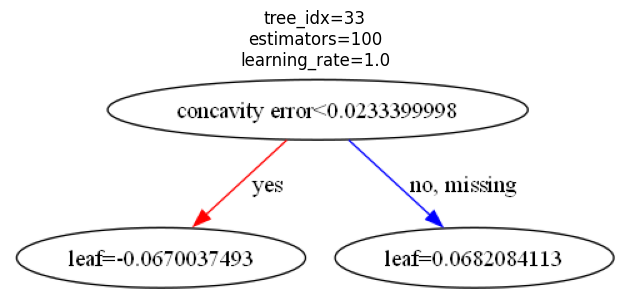

In [12]:
mi_exploracion_xgboost(mi_tree_idx=33)


Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        42
      benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1800x2400 with 0 Axes>

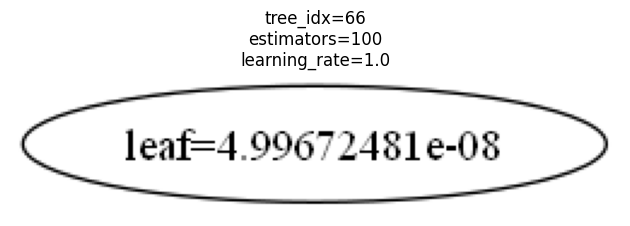

In [13]:
mi_exploracion_xgboost(mi_tree_idx=66)


Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        42
      benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1800x2400 with 0 Axes>

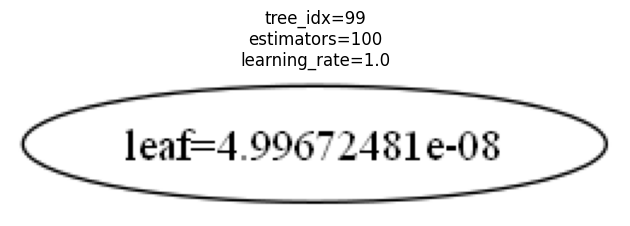

In [14]:
mi_exploracion_xgboost(mi_tree_idx=99)

**4a)** El argumento `mi_tree_idx` indica el índice del árbol individual dentro del ensemble de XGBoost que se desea visualizar. XGBoost construye una secuencia de árboles de forma aditiva (boosting); este argumento selecciona cuál de ellos se grafica. Su rango va de **0** (primer árbol) hasta **n_estimators - 1** (último árbol). Con los parámetros por defecto de la función (`mis_estimadores=100`), el rango válido es de **0 a 99**.

**4b) Explicación de las salidas:**

- **tree_idx=0 (primer árbol):** Es el árbol más complejo del ensemble, ya que captura los patrones principales de separación entre clases directamente de los datos originales. Presenta mayor profundidad y número de nodos.
- **tree_idx=33 (intermedio temprano):** El árbol es más simple que el primero. En esta etapa, los residuos que quedan por corregir son menores, por lo que el árbol necesita menos splits.
- **tree_idx=66 (intermedio tardío):** Aún más simple. La complejidad sigue decreciendo conforme los árboles posteriores tienen menos error residual que modelar.
- **tree_idx=99 (último árbol):** El árbol más simple del ensemble. Los errores residuales restantes son mínimos, por lo que este árbol realiza ajustes muy finos con pocos nodos.

Nota: el reporte de clasificación es idéntico en los 4 casos porque el modelo entrenado no cambia (mismos hiperparámetros); solo varía el árbol visualizado.

**4c) Conclusiones:**

Estos resultados ilustran el mecanismo de **gradient boosting** en XGBoost: cada árbol sucesivo se entrena sobre los residuos (errores) del modelo acumulado hasta ese punto. Los primeros árboles capturan los patrones generales más importantes, mientras que los posteriores realizan correcciones cada vez más finas. Esto se manifiesta en la **complejidad decreciente** de los árboles conforme aumenta `tree_idx`. El modelo final es la suma ponderada de las predicciones de todos los árboles.

## **Ejercicio - 5**

**Utiliza la función mi_exploracion_xgboost() definida peviamente para explicar las salidas de los casos. Muestra la salida de dichos casos:**

**5a) mi_exploracion_xgboost(mi_learning_rate=10., mi_tree_idx=50).**

**5b) mi_exploracion_xgboost(mi_learning_rate=1., mi_tree_idx=50),**

**5c) mi_exploracion_xgboost(mi_learning_rate=0.1, mi_tree_idx=50),**

**5d) mi_exploracion_xgboost(mi_learning_rate=0.01, mi_tree_idx=50),**

**5e) mi_exploracion_xgboost(mi_learning_rate=0.001, mi_tree_idx=50).**

* **Explica el efecto del argumento "learning_rate" y explica la salida de cada uno de estos resultados.**


Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        42
      benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1800x2400 with 0 Axes>

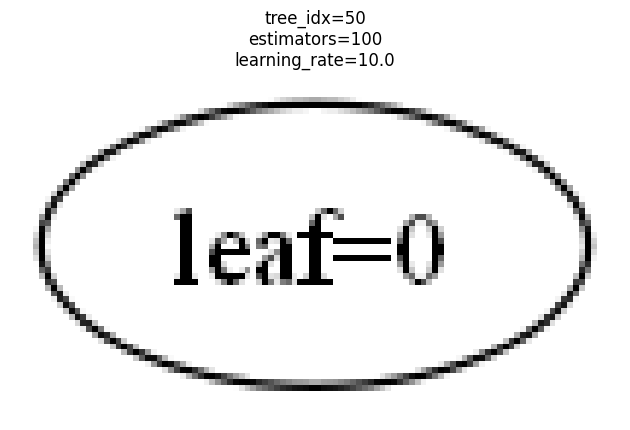

In [15]:
# 5a)
mi_exploracion_xgboost(mi_learning_rate=10., mi_tree_idx=50)


Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        42
      benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1800x2400 with 0 Axes>

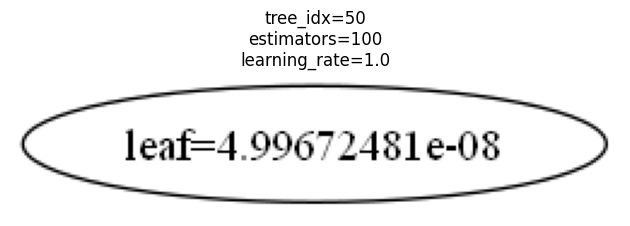

In [16]:
# 5b)
mi_exploracion_xgboost(mi_learning_rate=1., mi_tree_idx=50)


Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        42
      benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1800x2400 with 0 Axes>

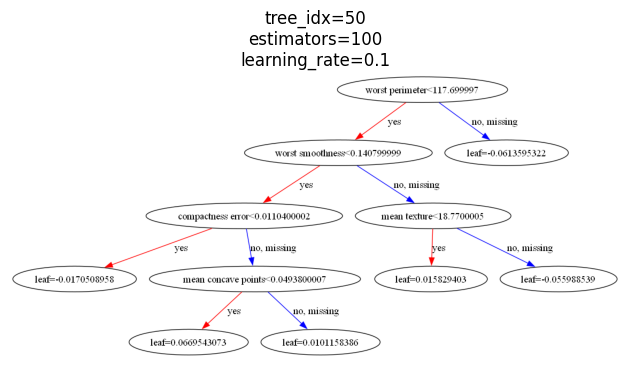

In [17]:
# 5c)
mi_exploracion_xgboost(mi_learning_rate=0.1, mi_tree_idx=50)


Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        42
      benign       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1800x2400 with 0 Axes>

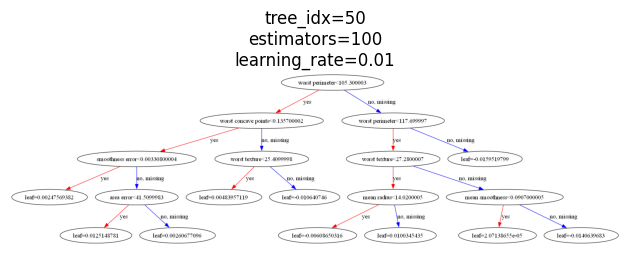

In [18]:
# 5d)
mi_exploracion_xgboost(mi_learning_rate=0.01, mi_tree_idx=50)


Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.00      0.00      0.00        42
      benign       0.63      1.00      0.77        72

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



c:\Users\Carlos Galvan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Carlos Galvan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Carlos Galvan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

<Figure size 1800x2400 with 0 Axes>

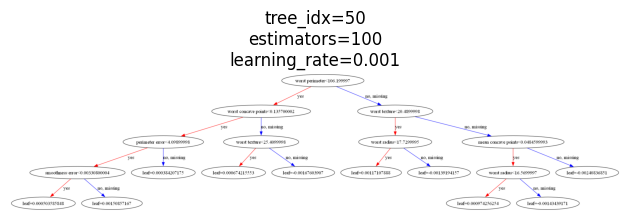

In [19]:
# 5e)
mi_exploracion_xgboost(mi_learning_rate=0.001, mi_tree_idx=50)

**Explicación del efecto del learning_rate:**

El `learning_rate` (tasa de aprendizaje, también llamado *shrinkage*) controla cuánto contribuye cada árbol individual al modelo final. Cada predicción de árbol se multiplica por este factor antes de sumarse al ensemble, actuando como regularización.

- **5a) learning_rate=10.0:** Valor extremadamente alto. Cada árbol tiene una influencia desproporcionada en el modelo, lo que puede causar sobreajuste severo o inestabilidad numérica. El modelo se satura rápidamente y los árboles en posiciones intermedias como tree_idx=50 tienden a ser muy simples o degenerados, ya que prácticamente no quedan residuos significativos que corregir.

- **5b) learning_rate=1.0:** Valor por defecto de la función. Cada árbol contribuye su predicción completa. El modelo converge rápidamente con 100 estimadores. El árbol en la posición 50 es relativamente simple, ya que gran parte del aprendizaje se completó en los primeros árboles. Buen rendimiento pero con riesgo de sobreajuste.

- **5c) learning_rate=0.1:** Valor comúnmente usado en la práctica. Cada árbol aporta solo el 10% de su predicción, haciendo el aprendizaje más gradual y estable. Los árboles mantienen mayor complejidad incluso en posiciones avanzadas del ensemble. El rendimiento generalmente se mantiene alto y la generalización mejora al reducir el sobreajuste.

- **5d) learning_rate=0.01:** Valor muy conservador. Con solo 100 árboles, el modelo no ha convergido completamente, lo que se refleja en una caída del rendimiento. Los árboles individuales siguen siendo complejos porque quedan errores residuales significativos por corregir. Se necesitarían muchos más estimadores para alcanzar un rendimiento óptimo.

- **5e) learning_rate=0.001:** Valor extremadamente bajo. El modelo está severamente **subentrenado** (underfitting) con solo 100 estimadores, ya que la contribución acumulada es mínima. El rendimiento cae notablemente. Se necesitarían miles de árboles para compensar esta tasa tan baja.

**Conclusión:** Existe una relación inversa entre `learning_rate` y el número de estimadores necesarios para converger. Un learning_rate bajo requiere más árboles pero generalmente produce mejor generalización. Un learning_rate alto converge rápido pero con riesgo de sobreajuste. La práctica recomendada es usar un learning_rate moderadamente bajo (0.01-0.1) con suficientes estimadores.

## **Ejercicio - 6**

**Incluye tus comentarios finales de esta actividad:**

++++++++++++++ Inicia sección de tus comentarios ++++++++++++++++++

En esta actividad se exploraron dos aspectos fundamentales del aprendizaje automático aplicado a clasificación.

**Parte A - Métricas:** Se demostró que la exactitud (accuracy) es una métrica engañosa en problemas con clases desbalanceadas, ya que un modelo base ingenuo alcanza un 88% simplemente prediciendo la clase mayoritaria. Las métricas de Precision, Recall y F1-Score proporcionan una evaluación más informativa del desempeño real, especialmente sobre la clase minoritaria de interés. Es esencial establecer valores base (baseline) con modelos Dummy para determinar si un modelo entrenado realmente aporta valor predictivo.

**Parte B - XGBoost:** Se exploró el comportamiento del modelo XGBoost mediante sus hiperparámetros. El análisis de `tree_idx` reveló el mecanismo de gradient boosting: los árboles iniciales capturan los patrones principales mientras que los posteriores realizan ajustes finos, reflejándose en complejidad decreciente. El `learning_rate` demostró el equilibrio crítico entre velocidad de convergencia y calidad de generalización: valores muy altos causan sobreajuste o inestabilidad, mientras que valores muy bajos requieren significativamente más estimadores para converger. La configuración óptima de XGBoost requiere balancear `learning_rate` con `n_estimators`, buscando un compromiso que permita buena generalización sin subentrenamiento.

+++++++++++++ Termina sección de tus comentarios +++++++++++++++++++

# **<<Fin de la Actividad de la Semana : modelos basados en árboles>>**